In [1]:
%pylab inline
import pandas as pd
from mpl_toolkits import mplot3d
from random import sample

Populating the interactive namespace from numpy and matplotlib


# Ecuación Normal.

Una forma de generalizar la regresión lineal  para $N$ características es

\begin{equation*}
    \begin{split}
    J = \frac{1}{2m} &\left( \begin{bmatrix} \theta_0 & \theta_1 & \cdots & \theta_n \end{bmatrix} \begin{bmatrix} 1 & 1 & \cdots & 1 \\ 
 x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
 \vdots & \vdots & \cdots & \vdots \\
 x_n^{(1)} & x_n^{(2)} & \cdots & x_n^{(m)} \\\end{bmatrix} - \begin{bmatrix} y^{(1)} & \cdots & y^{(m)} \end{bmatrix} \right)
 \left( \begin{bmatrix} 1 & x_1^{(1)} & \cdots & x_n^{(1)} \\
  1 & x_1^{(2)} & \cdots & x_n^{(2)} \\
  \vdots & \vdots & \cdots & \vdots \\
  1 & x_1^{(m)} & \cdots & x_n^{(m)} \end{bmatrix} \begin{bmatrix} \theta_0 \\ 
 \theta_1 \\
 \vdots \\
 \theta_n \end{bmatrix} - \begin{bmatrix} y^{(1)} \\
  y^{(2)} \\ 
  \ldots \\
  y^{(m)} \end{bmatrix} \right)
    \end{split}
\end{equation*}

con 

\begin{equation}
    \Theta=\begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix}
    \qquad \tilde{X}=\begin{bmatrix} 1 & 1 & \cdots & 1 \\ 
 x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
 \vdots & \vdots & \cdots & \vdots \\
 x_n^{(1)} & x_n^{(2)} & \cdots & x_n^{(m)} \\\end{bmatrix} \qquad y=\begin{bmatrix} y^{(1)} \\ 
y^{(2)} \\ 
\vdots \\
y^{(m)} \end{bmatrix}
\end{equation}

la función de coste es

\begin{equation*}
    J(\Theta) = \frac{1}{2m}(\Theta^T\tilde{X}-y^T)(\Theta^T\tilde{X}-y^T)^T
\end{equation*}

cuyo valor mínimo se da para el vector $\Theta$:

\begin{equation}
    \Theta = (\tilde{X}\tilde{X}^T)^{-1}\tilde{X} y \qquad\qquad (1)
\end{equation}

### Ejemplo.

En el laboratorio anterior, para el plano $y = 2x^1+3x^2$ se generarán datos y buscaremos obtener los coeficientes de la ecuación del plano a partir de estos datos. EN esta ocación,vamos a hacer usando la ecuación normal.

In [2]:
def Plano(x,y):
    return 2*x+3*y

#Rangos.
xMin, xMax, yMin, yMax = [0., 1., 0., 1.]

n = 1000

X_data = [[(xMax-xMin)*np.random.random()+xMin, (yMax-yMin)*np.random.random()+yMin] for i in range(n)]
y_data = [ Plano(pair[0], pair[1]) for pair in X_data]

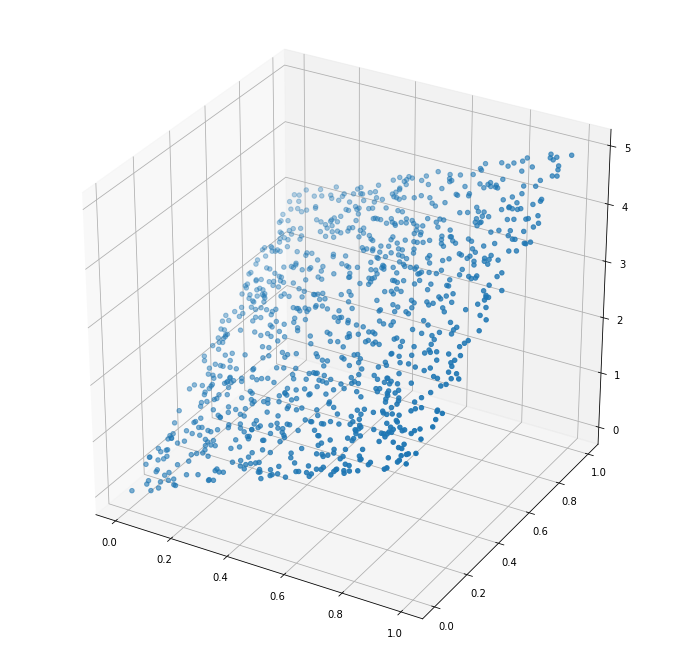

In [3]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111 ,projection='3d')

ax.scatter(np.transpose(X_data)[0], np.transpose(X_data)[1], y_data)
plt.show()

Dentro de estos puntos vamos a seleccionar una **muestra** que servirá como *training_set*.

In [4]:
m = 20
X_sample = sample(X_data, m)
y_sample = Plano(np.transpose(X_sample)[0], np.transpose(X_sample)[1])

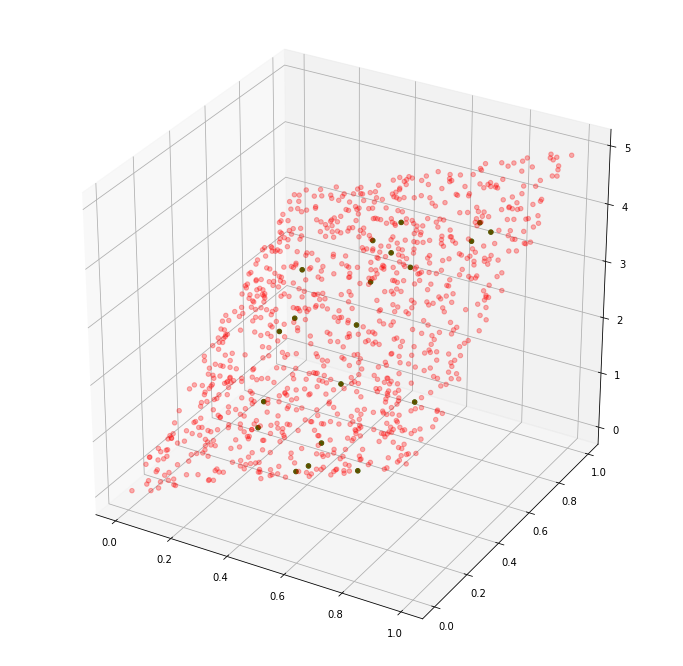

In [5]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111 ,projection='3d')

ax.scatter(np.transpose(X_data)[0], np.transpose(X_data)[1], y_data, c='red', alpha=0.3)
ax.scatter(np.transpose(X_sample)[0], np.transpose(X_sample)[1], y_sample, c='green', alpha=1.)
plt.show()

A partir de la ecuación $(1)$ hallamos los parámetros que recuperan la ecuación del plano.

In [92]:
def Θmin(X_data, y_data):
    m = len(y_data)
    a = np.ones(m).reshape(1,m)
    b = np.matrix([*np.transpose(X_data)])
    X_tild = np.concatenate((a, b), axis=0)
    
    Θ = (np.linalg.inv(X_tild@np.transpose(X_tild))@X_tild)@y_data 
    
    return Θ

In [105]:
print('Los parámetros determinados a partir de la ecuación normal fueron:')
for i in range(3):
    print('theta'+str(i)+': {:.6}'.format(Θmin(X_sample, y_sample)[0,i]))

Los parámetros determinados a partir de la ecuación normal fueron:
theta0: -5.38458e-15
theta1: 2.0
theta2: 3.0


Con la ecuación normal se **hallaron los coeficientes** de la ecuación del plano de una forma **más eficiente** que la presentada en el laboratorio anterior usando GD.

### Ejemplo con datos reales.

In [106]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame({"mean_":target, "rm":data[:,5]})

In [107]:
df.head()

,mean_,rm
0,24.0,6.575
1,21.6,6.421
2,34.7,7.185
3,33.4,6.998
4,36.2,7.147


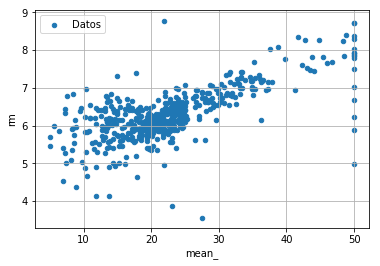

In [126]:
df.plot.scatter(x='mean_', y='rm', label='Datos')
plt.grid()

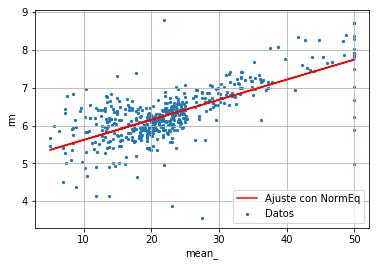

In [129]:
b, m = Θmin(df.mean_, df.rm)

df.plot.scatter(x='mean_', y='rm', marker='.', label='Datos')
plt.plot(df.mean_, b+m*df.mean_, 'r', label='Ajuste con NormEq')
plt.legend()
plt.grid()